In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import solve_ivp

# Sistema LasR/LasI

\begin{equation}
    \dot{[lasR]} = \kappa_{lasR} - 
    [lasR]\gamma_{lasR}
\end{equation}

\begin{equation}
    \dot{[LasR]} = [lasR]\kappa_{LasR} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    [AI_{1}][LasR]\mu_{LasR\cdot AI1} -
    [LasR]\gamma_{LasR}
\end{equation}

\begin{equation}
    \dot{[lasI]} = \alpha_{lasI} + 
    \frac{\beta_{lasI}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{1}}\right)^{h_{1}}} - 
    [lasI]\gamma_{lasI}
\end{equation}

\begin{equation}
    \dot{[LasI]} = [lasI]\kappa_{LasI} - 
    [LasI]\gamma_{LasI}
\end{equation}

\begin{equation}
    \dot{[AI_{1}]} = [LasI]\kappa_{AI1} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    [AI_1][LasR]\mu_{LasR{\cdot}AI1} -
    (d(AI_{1}-AI_{1ext})) -
    [AI_1]\gamma_{AI1}
\end{equation}

\begin{equation}
    \dot{[AI_{1ext}]} = (N\cdot d(AI_{1}-AI_{1ext})) -
    [AI_{1ext}](\gamma_{AI1ext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[LasR{\cdot}AI_{1}]} = [AI_{1}][LasR]\mu_{LasR{\cdot}AI1} -
    [LasR{\cdot}AI_{1}](\sigma_{LasR{\cdot}AI1} + \gamma_{LasR{\cdot}AI1})
\end{equation}

In [2]:
def LasRI_qs(t, r):
    lasR, LasR, lasI, LasI, AI1, AI1_ext, LasRAI1 = r
    
    # LasR/LasI
    k_lasR = 0.004
    g_lasR = 0.002
    k_LasR = 0.4
    g_LasR = 0.35
    a_lasI = 0.00036
    b_lasI = 0.0058
    K1 = 1.2
    h1 = -1.4
    g_lasI = 0.001
    k_LasI = 0.7
    g_LasI = 0.12
    k_AI1 = 1
    g_AI1 = 0.3
    g_AI1_ext = 0.8
    u_LasRAI1 = 0.05
    s_LasRAI1 = 0.25
    g_LasRAI1 = 0.14
    # Cell parameters
    d = 0.8
    d_away = 1.2
    N = 10
    
    dlasR = k_lasR - lasR*g_lasR
    dLasR = lasR*k_LasR + LasRAI1*s_LasRAI1 - AI1*LasR*u_LasRAI1 - LasR*g_LasR
    dlasI = a_lasI + (b_lasI/(1+(LasRAI1/K1)**h1)) - lasI*g_lasI
    dLasI = lasI*k_LasI - LasI*g_LasI
    dAI1 = LasI*k_AI1 + LasRAI1*s_LasRAI1 - AI1*LasR*u_LasRAI1 - (d*(AI1-AI1_ext)) - AI1*g_AI1
    dAI1_ext = (N*d*(AI1-AI1_ext)) - (AI1_ext*(g_AI1_ext + d_away))
    dLasRAI1 = AI1*LasR*u_LasRAI1 - (LasRAI1*(s_LasRAI1 + g_LasRAI1))
    
    return np.array([dlasR, dLasR, dlasI, dLasI, dAI1, dAI1_ext, dLasRAI1])

In [3]:
LasRI_qs_dynamics_short = solve_ivp(LasRI_qs, [0, 170], [1, 1, 1, 1, 1, 1, 1])
LasRI_qs_dynamics_long = solve_ivp(LasRI_qs, [0, 5000], [1, 1, 1, 1, 1, 1, 1])

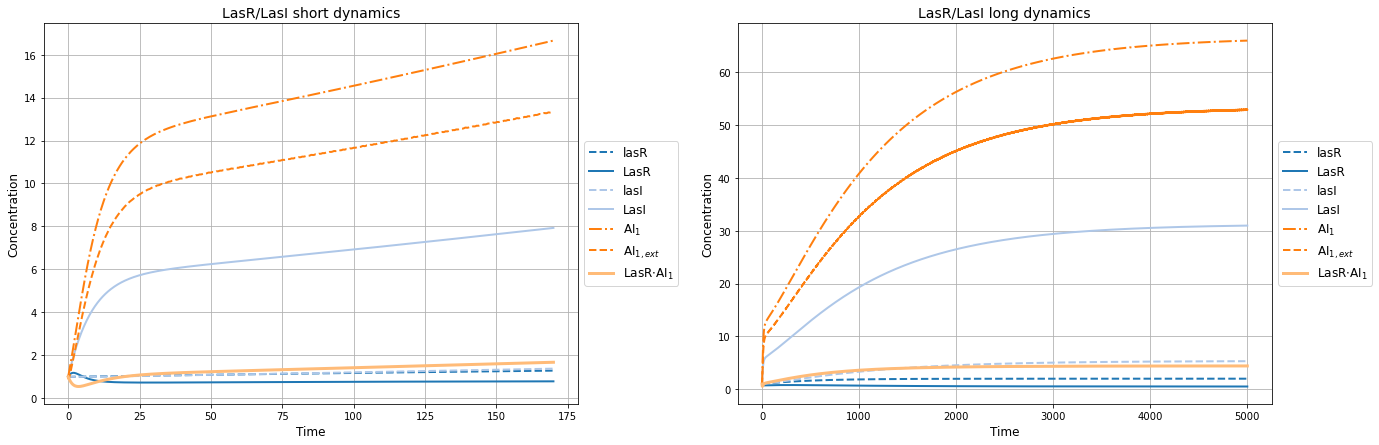

In [4]:
plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
plt.plot(LasRI_qs_dynamics_short.t, LasRI_qs_dynamics_short.y[0], lw=2, label='lasR', color=cm.tab20(0), ls='--')
plt.plot(LasRI_qs_dynamics_short.t, LasRI_qs_dynamics_short.y[1], lw=2, label='LasR', color=cm.tab20(0), ls='-')
plt.plot(LasRI_qs_dynamics_short.t, LasRI_qs_dynamics_short.y[2], lw=2, label='lasI', color=cm.tab20(1), ls='--')
plt.plot(LasRI_qs_dynamics_short.t, LasRI_qs_dynamics_short.y[3], lw=2, label='LasI', color=cm.tab20(1), ls='-') 
plt.plot(LasRI_qs_dynamics_short.t, LasRI_qs_dynamics_short.y[4], lw=2, label='AI$_1$', color=cm.tab20(2), ls='-.')
plt.plot(LasRI_qs_dynamics_short.t, LasRI_qs_dynamics_short.y[5], lw=2, label='AI$_{1,ext}$', color=cm.tab20(2), ls='--')
plt.plot(LasRI_qs_dynamics_short.t, LasRI_qs_dynamics_short.y[6], lw=3, label='LasR$\cdot$AI$_1$', color=cm.tab20(3), ls='-')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.20, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('LasR/LasI short dynamics', fontsize=14)
plt.subplot(1,2,2)
plt.plot(LasRI_qs_dynamics_long.t, LasRI_qs_dynamics_long.y[0], lw=2, label='lasR', color=cm.tab20(0), ls='--')
plt.plot(LasRI_qs_dynamics_long.t, LasRI_qs_dynamics_long.y[1], lw=2, label='LasR', color=cm.tab20(0), ls='-')
plt.plot(LasRI_qs_dynamics_long.t, LasRI_qs_dynamics_long.y[2], lw=2, label='lasI', color=cm.tab20(1), ls='--')
plt.plot(LasRI_qs_dynamics_long.t, LasRI_qs_dynamics_long.y[3], lw=2, label='LasI', color=cm.tab20(1), ls='-') 
plt.plot(LasRI_qs_dynamics_long.t, LasRI_qs_dynamics_long.y[4], lw=2, label='AI$_1$', color=cm.tab20(2), ls='-.')
plt.plot(LasRI_qs_dynamics_long.t, LasRI_qs_dynamics_long.y[5], lw=2, label='AI$_{1,ext}$', color=cm.tab20(2), ls='--')
plt.plot(LasRI_qs_dynamics_long.t, LasRI_qs_dynamics_long.y[6], lw=3, label='LasR$\cdot$AI$_1$', color=cm.tab20(3), ls='-')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.20, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('LasR/LasI long dynamics', fontsize=14)
plt.show()

# Sistema LasR/LasI con RsaL

\begin{equation}
    \dot{[lasR]} = \kappa_{lasR} - 
                   [lasR]\gamma_{lasR}
\end{equation}

\begin{equation}
    \dot{[LasR]} = [lasR]\kappa_{LasR} + 
                   [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
                   [AI_{1}][LasR]\mu_{LasR\cdot AI1} -
                   [LasR]\gamma_{LasR}
\end{equation}

\begin{equation}
    \dot{[rsaL]} = \alpha_{rsaL} + 
                   \frac{\beta_{rsaL}}{1+\left(\frac{[LasR{\cdot}AI_1]}{K_1}\right)^{h_1}} -
                   [rsaL]\gamma_{rsaL}
\end{equation}

\begin{equation}
    \dot{[RsaL]} = [rsaL]\kappa_{RsaL} -
                   [RsaL]\gamma_{RsaL}
\end{equation}

\begin{equation}
    \dot{[lasI]} = \alpha_{lasI} + 
                   \frac{\beta_{lasI}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{2}}\right)^{h_{2}}} +
                   \frac{\beta_{lasI}}{1+\left(\frac{[RsaL]}{K_{3}}\right)^{h_{3}}} - 
                   [lasI]\gamma_{lasI}
\end{equation}

\begin{equation}
    \dot{[LasI]} = [lasI]\kappa_{LasI} - 
                   [LasI]\gamma_{LasI}
\end{equation}

\begin{equation}
    \dot{[AI_{1}]} = [LasI]\kappa_{AI1} + 
                     [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
                     [AI_1][LasR]\mu_{LasR{\cdot}AI1} -
                     (d(AI_{1}-AI_{1ext})) -
                     [AI_1]\gamma_{AI1}
\end{equation}

\begin{equation}
    \dot{[AI_{1ext}]} = (N\cdot d(AI_{1}-AI_{1ext})) -
                        [AI_{1ext}](\gamma_{AI1ext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[LasR{\cdot}AI_{1}]} = [AI_{1}][LasR]\mu_{LasR{\cdot}AI1} -
                                [LasR{\cdot}AI_{1}](\sigma_{LasR{\cdot}AI1} + \gamma_{LasR{\cdot}AI1})
\end{equation}

In [5]:
def LasRI_RsaL_qs(t, r):
    lasR, LasR, rsaL, RsaL, lasI, LasI, AI1, AI1_ext, LasRAI1 = r
    
    # LasR/LasI
    k_lasR = 0.004
    g_lasR = 0.002
    k_LasR = 0.4
    g_LasR = 0.35
    a_rsaL = 0.00036
    b_rsaL = 0.0058
    K1 = 1.2
    h1 = -1.4
    g_rsaL = 0.001
    k_RsaL = 0.9
    g_RsaL = 0.2
    a_lasI = 0.00036
    b_lasI = 0.0058
    K2 = 1.2
    h2 = -1.4
    K3 = 1.4
    h3 = 1.2
    g_lasI = 0.001
    k_LasI = 0.7
    g_LasI = 0.12
    k_AI1 = 1
    g_AI1 = 0.3
    g_AI1_ext = 0.8
    u_LasRAI1 = 0.05
    s_LasRAI1 = 0.25
    g_LasRAI1 = 0.14
    # Cell parameters
    d = 0.8
    d_away = 1.2
    N = 10
    
    dlasR = k_lasR - lasR*g_lasR
    dLasR = lasR*k_LasR + LasRAI1*s_LasRAI1 - AI1*LasR*u_LasRAI1 - LasR*g_LasR
    drsaL = a_rsaL + (b_rsaL/(1+(LasRAI1/K1)**h1)) - rsaL*g_rsaL
    dRsaL = rsaL*k_RsaL - RsaL*g_RsaL
    dlasI = a_lasI + (b_lasI/(1+(LasRAI1/K2)**h2)) + (b_lasI/(1+(RsaL/K3)**h3)) - lasI*g_lasI
    dLasI = lasI*k_LasI - LasI*g_LasI
    dAI1 = LasI*k_AI1 + LasRAI1*s_LasRAI1 - AI1*LasR*u_LasRAI1 - (d*(AI1-AI1_ext)) - AI1*g_AI1
    dAI1_ext = (N*d*(AI1-AI1_ext)) - (AI1_ext*(g_AI1_ext + d_away))
    dLasRAI1 = AI1*LasR*u_LasRAI1 - (LasRAI1*(s_LasRAI1 + g_LasRAI1))
    
    return np.array([dlasR, dLasR, drsaL, dRsaL, dlasI, dLasI, dAI1, dAI1_ext, dLasRAI1])

In [6]:
LasRI_RsaL_qs_dynamics_short = solve_ivp(LasRI_RsaL_qs, [0, 170], [1, 1, 1, 1, 1, 1, 1, 1, 1])
LasRI_RsaL_qs_dynamics_long = solve_ivp(LasRI_RsaL_qs, [0, 5000], [1, 1, 1, 1, 1, 1, 1, 1, 1])

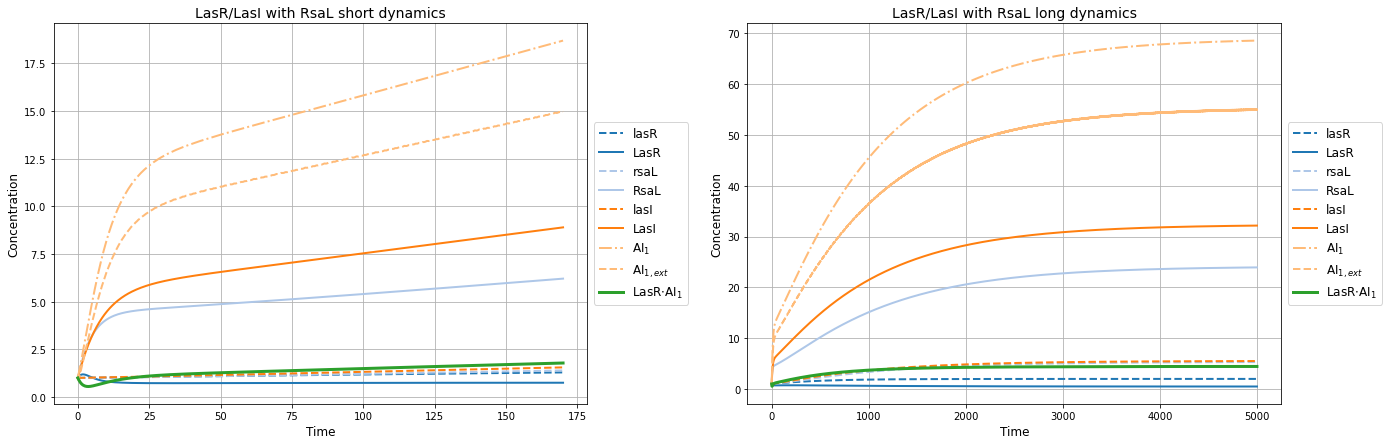

In [7]:
plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
plt.plot(LasRI_RsaL_qs_dynamics_short.t, LasRI_RsaL_qs_dynamics_short.y[0], lw=2, label='lasR', color=cm.tab20(0), ls='--')
plt.plot(LasRI_RsaL_qs_dynamics_short.t, LasRI_RsaL_qs_dynamics_short.y[1], lw=2, label='LasR', color=cm.tab20(0), ls='-')
plt.plot(LasRI_RsaL_qs_dynamics_short.t, LasRI_RsaL_qs_dynamics_short.y[2], lw=2, label='rsaL', color=cm.tab20(1), ls='--')
plt.plot(LasRI_RsaL_qs_dynamics_short.t, LasRI_RsaL_qs_dynamics_short.y[3], lw=2, label='RsaL', color=cm.tab20(1), ls='-')
plt.plot(LasRI_RsaL_qs_dynamics_short.t, LasRI_RsaL_qs_dynamics_short.y[4], lw=2, label='lasI', color=cm.tab20(2), ls='--')
plt.plot(LasRI_RsaL_qs_dynamics_short.t, LasRI_RsaL_qs_dynamics_short.y[5], lw=2, label='LasI', color=cm.tab20(2), ls='-') 
plt.plot(LasRI_RsaL_qs_dynamics_short.t, LasRI_RsaL_qs_dynamics_short.y[6], lw=2, label='AI$_1$', color=cm.tab20(3), ls='-.')
plt.plot(LasRI_RsaL_qs_dynamics_short.t, LasRI_RsaL_qs_dynamics_short.y[7], lw=2, label='AI$_{1,ext}$', color=cm.tab20(3), ls='--')
plt.plot(LasRI_RsaL_qs_dynamics_short.t, LasRI_RsaL_qs_dynamics_short.y[8], lw=3, label='LasR$\cdot$AI$_1$', color=cm.tab20(4), ls='-')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.20, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('LasR/LasI with RsaL short dynamics', fontsize=14)
plt.subplot(1,2,2)
plt.plot(LasRI_RsaL_qs_dynamics_long.t, LasRI_RsaL_qs_dynamics_long.y[0], lw=2, label='lasR', color=cm.tab20(0), ls='--')
plt.plot(LasRI_RsaL_qs_dynamics_long.t, LasRI_RsaL_qs_dynamics_long.y[1], lw=2, label='LasR', color=cm.tab20(0), ls='-')
plt.plot(LasRI_RsaL_qs_dynamics_long.t, LasRI_RsaL_qs_dynamics_long.y[2], lw=2, label='rsaL', color=cm.tab20(1), ls='--')
plt.plot(LasRI_RsaL_qs_dynamics_long.t, LasRI_RsaL_qs_dynamics_long.y[3], lw=2, label='RsaL', color=cm.tab20(1), ls='-')
plt.plot(LasRI_RsaL_qs_dynamics_long.t, LasRI_RsaL_qs_dynamics_long.y[4], lw=2, label='lasI', color=cm.tab20(2), ls='--')
plt.plot(LasRI_RsaL_qs_dynamics_long.t, LasRI_RsaL_qs_dynamics_long.y[5], lw=2, label='LasI', color=cm.tab20(2), ls='-') 
plt.plot(LasRI_RsaL_qs_dynamics_long.t, LasRI_RsaL_qs_dynamics_long.y[6], lw=2, label='AI$_1$', color=cm.tab20(3), ls='-.')
plt.plot(LasRI_RsaL_qs_dynamics_long.t, LasRI_RsaL_qs_dynamics_long.y[7], lw=2, label='AI$_{1,ext}$', color=cm.tab20(3), ls='--')
plt.plot(LasRI_RsaL_qs_dynamics_long.t, LasRI_RsaL_qs_dynamics_long.y[8], lw=3, label='LasR$\cdot$AI$_1$', color=cm.tab20(4), ls='-')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.20, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('LasR/LasI with RsaL long dynamics', fontsize=14)
plt.show()

# Sistema LasR/LasI y RhlR/RhlI

\begin{equation}
    \dot{[lasR]} = \kappa_{lasR} - 
    [lasR]\gamma_{lasR}
\end{equation}

\begin{equation}
    \dot{[LasR]} = [lasR]\kappa_{LasR} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    [AI_{1}][LasR]\mu_{LasR\cdot AI1} -
    [LasR]\gamma_{LasR}
\end{equation}

\begin{equation}
    \dot{[lasI]} = \alpha_{lasI} + 
    \frac{\beta_{lasI}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{1}}\right)^{h_{1}}} - 
    [lasI]\gamma_{lasI}
\end{equation}

\begin{equation}
    \dot{[LasI]} = [lasI]\kappa_{LasI} - 
    [LasI]\gamma_{LasI}
\end{equation}

\begin{equation}
    \dot{[AI_{1}]} = [LasI]\kappa_{AI1} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    [AI_1][LasR]\mu_{LasR{\cdot}AI1} -
    (d(AI_{1}-AI_{1ext})) -
    [AI_1]\gamma_{AI1}
\end{equation}

\begin{equation}
    \dot{[AI_{1ext}]} = (N\cdot d(AI_{1}-AI_{1ext})) -
    [AI_{1ext}](\gamma_{AI1ext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[LasR{\cdot}AI_{1}]} = [AI_{1}][LasR]\mu_{LasR{\cdot}AI1} -
    [LasR{\cdot}AI_{1}](\sigma_{LasR{\cdot}AI1} + \gamma_{LasR{\cdot}AI1})
\end{equation}

\begin{equation}
    \dot{[rhlR]} = \alpha_{rhlR} + 
    \frac{\beta_{rhlR}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{2}}\right)^{h_{2}}} - 
    [rhlR]\gamma_{rhlR}
\end{equation}

\begin{equation}
    \dot{[RhlR]} = [rhlR]\kappa_{RhlR} +
    [RhlR\cdot AI_2]\sigma_{RhlR\cdot AI2} -
    [AI_2][RhlR]\mu_{RhlR\cdot AI2} -
    [RhlR]\gamma_{RhlR}
\end{equation}

\begin{equation}
    \dot{[rhlI]} = \alpha_{rhlI} + 
    \frac{\beta_{rhlI}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{3}}\right)^{h_{3}}} + 
    \frac{\beta_{rhlI}}{1+\left(\frac{[RhlR{\cdot}AI_{2}]}{K_{4}}\right)^{h_{4}}} - 
    [rhlI]\gamma_{rhlI}
\end{equation}

\begin{equation}
    \dot{[RhlI]} = [rhlI]\kappa_{RhlI} - 
    [RhlI]\gamma_{RhlI}
\end{equation}

\begin{equation}
    \dot{[AI_{2}]} = [RhlI]\kappa_{AI2} + 
    [RhlR{\cdot}AI_{2}]\sigma_{RhlR{\cdot}AI2} - 
    [AI_2][RhlR]\mu_{RhlR{\cdot}AI2} -
    (d(AI_{2}-AI_{2ext})) -
    [AI_2]\gamma_{AI2}
\end{equation}

\begin{equation}
    \dot{[AI_{2ext}]} = (N\cdot d(AI_{2}-AI_{2ext})) -
    [AI_{2ext}](\gamma_{AI2ext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[RhlR{\cdot}AI_{2}]} = [AI_{2}][RhlR]\mu_{RhlR{\cdot}AI2} - 
    [RhlR{\cdot}AI_{2}](\sigma_{RhlR{\cdot}AI2} + \gamma_{RhlR{\cdot}AI2})
\end{equation}

\begin{equation}
    \dot{[p]} = \alpha_{p} + 
    \frac{\beta_{p}}{1+\left(\frac{[RhlR{\cdot}AI_{2}]}{K_{5}}\right)^{h_{5}}} - 
    [p]\gamma_{p}
\end{equation}

\begin{equation}
    \dot{[P]} = [p]\kappa_{P} - 
    [P]\gamma_{P}
\end{equation}

In [8]:
def LasRI_RhlRI_qs(t, r):
    lasR, LasR, lasI, LasI, AI1, AI1_ext, LasRAI1, rhlR, RhlR, rhlI, RhlI, AI2, AI2_ext, RhlRAI2, p, P = r
    
    # LasR/LasI
    k_lasR = 0.004
    g_lasR = 0.002
    k_LasR = 0.4
    g_LasR = 0.35
    a_lasI = 0.00036
    b_lasI = 0.0058
    K1 = 1.2
    h1 = -1.4
    g_lasI = 0.001
    k_LasI = 0.7
    g_LasI = 0.12
    k_AI1 = 1
    g_AI1 = 0.3
    g_AI1_ext = 0.8
    u_LasRAI1 = 0.05
    s_LasRAI1 = 0.25
    g_LasRAI1 = 0.14
    # RhlR/RhlI
    a_rhlR = 0
    b_rhlR = 0.0045
    K2 = 1.5
    h2 = -1.2
    g_rhlR = 0.002
    k_RhlR = 0.4
    g_RhlR = 0.35
    a_rhlI = 0.00036
    b_rhlI = 0.0058
    K3 = 1.5
    h3 = -1.2
    K4 = 1.2
    h4 = -1.4
    g_rhlI = 0.001
    k_RhlI = 0.7
    g_RhlI = 0.12
    k_AI2 = 1
    g_AI2 = 0.3
    g_AI2_ext = 0.8
    u_RhlRAI2 = 0.05
    s_RhlRAI2 = 0.25
    g_RhlRAI2 = 0.14
    # Target protein
    a_p = 0
    b_p = 0.0058
    K5 = 1.2
    h5 = -1.4
    g_p = 0.001
    k_P = 0.7
    g_P = 0.12
    # Cell parameters
    d = 0.8
    d_away = 1.2
    N = 10
    
    dlasR = k_lasR - lasR*g_lasR
    dLasR = lasR*k_LasR + LasRAI1*s_LasRAI1 - AI1*LasR*u_LasRAI1 - LasR*g_LasR
    dlasI = a_lasI + (b_lasI/(1+(LasRAI1/K1)**h1)) - lasI*g_lasI
    dLasI = lasI*k_LasI - LasI*g_LasI
    dAI1 = LasI*k_AI1 + LasRAI1*s_LasRAI1 - AI1*LasR*u_LasRAI1 - (d*(AI1-AI1_ext)) - AI1*g_AI1
    dAI1_ext = (N*d*(AI1-AI1_ext)) - (AI1_ext*(g_AI1_ext + d_away))
    dLasRAI1 = AI1*LasR*u_LasRAI1 - (LasRAI1*(s_LasRAI1 + g_LasRAI1))
    drhlR = a_rhlR + (b_rhlR/(1+(LasRAI1/K2)**h2)) - rhlR*g_lasR
    dRhlR = rhlR*k_RhlR + RhlRAI2*s_RhlRAI2 - AI2*RhlR*u_RhlRAI2 - RhlR*g_RhlR
    drhlI = a_rhlI + (b_rhlI/(1+(LasRAI1/K3)**h3)) + (b_rhlI/(1+(RhlRAI2/K4)**h4)) - rhlI*g_rhlI
    dRhlI = rhlI*k_RhlI - RhlI*g_RhlI
    dAI2 = RhlI*k_AI2 + RhlRAI2*s_RhlRAI2 - AI2*RhlR*u_RhlRAI2 - (d*(AI2-AI2_ext)) - AI2*g_AI2
    dAI2_ext = (N*d*(AI2-AI2_ext)) - (AI2_ext*(g_AI2_ext + d_away))
    dRhlRAI2 = AI2*RhlR*u_RhlRAI2 - (RhlRAI2*(s_RhlRAI2 + g_RhlRAI2))
    dp = a_p + (b_p/(1+(RhlRAI2/K5)**h5)) - p*g_p
    dP = p*k_P - P*g_P
    
    return np.array([dlasR, dLasR, dlasI, dLasI, dAI1, dAI1_ext, dLasRAI1, drhlR, dRhlR, drhlI, dRhlI, dAI2, dAI2_ext, dRhlRAI2, dp, dP])

In [9]:
LasRI_RhlRI_qs_dynamics_short = solve_ivp(LasRI_RhlRI_qs, [0, 170], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
LasRI_RhlRI_qs_dynamics_long = solve_ivp(LasRI_RhlRI_qs, [0, 5000], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

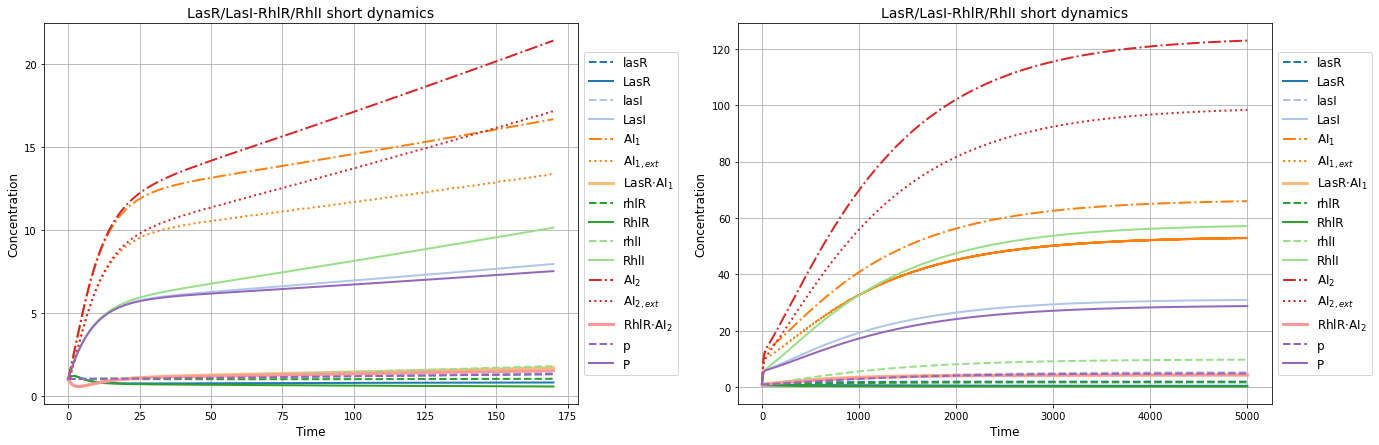

In [10]:
plt.figure(figsize=(22,7))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[0], lw=2, label='lasR', color=cm.tab20(0), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[1], lw=2, label='LasR', color=cm.tab20(0), ls='-')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[2], lw=2, label='lasI', color=cm.tab20(1), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[3], lw=2, label='LasI', color=cm.tab20(1), ls='-') 
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[4], lw=2, label='AI$_1$', color=cm.tab20(2), ls='-.')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[5], lw=2, label='AI$_{1,ext}$', color=cm.tab20(2), ls=':')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[6], lw=3, label='LasR$\cdot$AI$_1$', color=cm.tab20(3), ls='-')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[7], lw=2, label='rhlR', color=cm.tab20(4), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[8], lw=2, label='RhlR', color=cm.tab20(4), ls='-')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[9], lw=2, label='rhlI', color=cm.tab20(5), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[10], lw=2, label='RhlI', color=cm.tab20(5), ls='-') 
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[11], lw=2, label='AI$_2$', color=cm.tab20(6), ls='-.')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[12], lw=2, label='AI$_{2,ext}$', color=cm.tab20(6), ls=':')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[13], lw=3, label='RhlR$\cdot$AI$_2$', color=cm.tab20(7), ls='-')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[14], lw=2, label='p', color=cm.tab20(8), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_short.t, LasRI_RhlRI_qs_dynamics_short.y[15], lw=2, label='P', color=cm.tab20(8), ls='-')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.20, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('LasR/LasI-RhlR/RhlI short dynamics', fontsize=14)
plt.subplot(1,2,2)
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[0], lw=2, label='lasR', color=cm.tab20(0), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[1], lw=2, label='LasR', color=cm.tab20(0), ls='-')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[2], lw=2, label='lasI', color=cm.tab20(1), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[3], lw=2, label='LasI', color=cm.tab20(1), ls='-') 
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[4], lw=2, label='AI$_1$', color=cm.tab20(2), ls='-.')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[5], lw=2, label='AI$_{1,ext}$', color=cm.tab20(2), ls=':')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[6], lw=3, label='LasR$\cdot$AI$_1$', color=cm.tab20(3), ls='-')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[7], lw=2, label='rhlR', color=cm.tab20(4), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[8], lw=2, label='RhlR', color=cm.tab20(4), ls='-')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[9], lw=2, label='rhlI', color=cm.tab20(5), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[10], lw=2, label='RhlI', color=cm.tab20(5), ls='-') 
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[11], lw=2, label='AI$_2$', color=cm.tab20(6), ls='-.')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[12], lw=2, label='AI$_{2,ext}$', color=cm.tab20(6), ls=':')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[13], lw=3, label='RhlR$\cdot$AI$_2$', color=cm.tab20(7), ls='-')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[14], lw=2, label='p', color=cm.tab20(8), ls='--')
plt.plot(LasRI_RhlRI_qs_dynamics_long.t, LasRI_RhlRI_qs_dynamics_long.y[15], lw=2, label='P', color=cm.tab20(8), ls='-')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.20, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('LasR/LasI-RhlR/RhlI short dynamics', fontsize=14)
plt.show()

# Sistema completo (LasR/LasI, RhlR/RhlI & PQS)

\begin{equation}
    \dot{[lasR]} = \kappa_{lasR} - 
    [lasR]\gamma_{lasR}
\end{equation}

\begin{equation}
    \dot{[LasR]} = [lasR]\kappa_{LasR} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    [AI_{1}][LasR]\mu_{LasR\cdot AI1} -
    [LasR]\gamma_{LasR}
\end{equation}

\begin{equation}
    \dot{[lasI]} = \alpha_{lasI} + 
    \frac{\beta_{lasI}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{1}}\right)^{h_{1}}} - 
    [lasI]\gamma_{lasI}
\end{equation}

\begin{equation}
    \dot{[LasI]} = [lasI]\kappa_{LasI} - 
    [LasI]\gamma_{LasI}
\end{equation}

\begin{equation}
    \dot{[AI_{1}]} = [LasI]\kappa_{AI1} + 
    [LasR{\cdot}AI_{1}]\sigma_{LasR{\cdot}AI1} - 
    [AI_1][LasR]\mu_{LasR{\cdot}AI1} -
    (d(AI_{1}-AI_{1ext})) -
    [AI_1]\gamma_{AI1}
\end{equation}

\begin{equation}
    \dot{[AI_{1ext}]} = (N\cdot d(AI_{1}-AI_{1ext})) -
    [AI_{1ext}](\gamma_{AI1ext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[LasR{\cdot}AI_{1}]} = [AI_{1}][LasR]\mu_{LasR{\cdot}AI1} -
    [LasR{\cdot}AI_{1}](\sigma_{LasR{\cdot}AI1} + \gamma_{LasR{\cdot}AI1})
\end{equation}

\begin{equation}
    \dot{[rhlR]} = \alpha_{rhlR} + 
    \frac{\beta_{rhlR}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{2}}\right)^{h_{2}}} - 
    [rhlR]\gamma_{rhlR}
\end{equation}

\begin{equation}
    \dot{[RhlR]} = [rhlR]\kappa_{RhlR} +
    [RhlR\cdot AI_2]\sigma_{RhlR\cdot AI2} -
    [AI_2][RhlR]\mu_{RhlR\cdot AI2} -
    [RhlR]\gamma_{RhlR}
\end{equation}

\begin{equation}
    \dot{[rhlI]} = \alpha_{rhlI} + 
    \frac{\beta_{rhlI}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{3}}\right)^{h_{3}}} + 
    \frac{\beta_{rhlI}}{1+\left(\frac{[RhlR{\cdot}AI_{2}]}{K_{4}}\right)^{h_{4}}} +
    \frac{\beta_{rhlI}}{1+\left(\frac{[RhlR{\cdot}PqsE]}{K_{5}}\right)^{h_{5}}} - 
    [rhlI]\gamma_{rhlI}
\end{equation}

\begin{equation}
    \dot{[RhlI]} = [rhlI]\kappa_{RhlI} - 
    [RhlI]\gamma_{RhlI}
\end{equation}

\begin{equation}
    \dot{[AI_{2}]} = [RhlI]\kappa_{AI2} + 
    [RhlR{\cdot}AI_{2}]\sigma_{RhlR{\cdot}AI2} - 
    [AI_2][RhlR]\mu_{{RhlR\cdot}AI2} -
    (d(AI_{2}-AI_{2ext})) -
    [AI_2]\gamma_{AI2}
\end{equation}

\begin{equation}
    \dot{[AI_{2ext}]} = (N\cdot d(AI_{2}-AI_{2ext})) -
    [AI_{2ext}](\gamma_{AI2ext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[RhlR{\cdot}AI_{2}]} = [AI_{2}][RhlR]\mu_{RhlR{\cdot}AI2} - 
    [RhlR{\cdot}AI_{2}](\sigma_{RhlR{\cdot}AI2} + \gamma_{RhlR{\cdot}AI2})
\end{equation}

\begin{equation}
    \dot{[pqsR]} = \alpha_{pqsR} + 
    \frac{\beta_{pqsR}}{1+\left(\frac{[LasR{\cdot}AI_{1}]}{K_{6}}\right)^{h_{6}}} +
    \frac{\beta_{pqsR}}{1+\left(\frac{[RhlR{\cdot}AI_{2}]}{K_{7}}\right)^{h_{7}}} - 
    [pqsR]\gamma_{pqsR}
\end{equation}

\begin{equation}
    \dot{[PqsR]} = [pqsR]\kappa_{PqsR} +
    [PqsR{\cdot}PQS]\sigma_{PqsR{\cdot}PQS} - 
    [PQS][PqsR]\kappa_{PqsR{\cdot}PQS} -
    [PqsR]\gamma_{PqsR}
\end{equation}

\begin{equation}
    \dot{[pqsABCDE]} = \alpha_{pqsABCDE} + 
    \frac{\beta_{pqsABCDE}}{1+\left(\frac{[RhlR{\cdot}AI_{2}]}{K_{8}}\right)^{h_{8}}} +
    \frac{\beta_{pqsABCDE}}{1+\left(\frac{[PqsR{\cdot}PQS]}{K_{9}}\right)^{h_{9}}} - 
    [pqsABCDE]\gamma_{pqsABCDE}
\end{equation}

\begin{equation}
    \dot{[PqsABCD]} = [pqsABCDE]\kappa_{PqsABCD} - 
    [PqsABCD]\gamma_{PqsABCD}
\end{equation}

\begin{equation}
    \dot{[PqsE]} = [pqsABCDE]\kappa_{PqsE} +
    [RhlR{\cdot}PqsE]\sigma_{RhlR{\cdot}PqsE} - 
    [PqsE][RhlR]\mu_{RhlR{\cdot}PqsE} - 
    [PqsE]\gamma_{PqsE}
\end{equation}

\begin{equation}
    \dot{[PQS]} = [PqsABCD]\kappa_{PQS} +
    [PqsR{\cdot}PQS]\sigma_{PqsR{\cdot}PQS} - 
    [PQS][PqsR]\mu_{PqsR{\cdot}PQS} - 
    (d(PQS-PQS_{ext})) - 
    [PQS]\gamma_{PQS}
\end{equation}

\begin{equation}
    \dot{[PQS_{ext}]} = (N\cdot d(PQS-PQS_{ext})) -
    [PQS_{ext}](\gamma_{PQSext}+d_{away})
\end{equation}

\begin{equation}
    \dot{[PqsR{\cdot}PQS]} = [PQS][PqsR]\mu_{PqsR{\cdot}PQS} - 
    [PqsR{\cdot}PQS](\sigma_{PqsR{\cdot}PQS} + \gamma_{PqsR{\cdot}PQS})
\end{equation}

\begin{equation}
    \dot{[RhlR{\cdot}PqsE]} = [PqsE][RhlR]\mu_{RhlR{\cdot}PqsE} - 
    [RhlR{\cdot}PqsE](\sigma_{RhlR{\cdot}PqsE} + \gamma_{RhlR{\cdot}PqsE})
\end{equation}

\begin{equation}
    \dot{[p]} = \alpha_{p} + 
    \frac{\beta_{p}}{1+\left(\frac{[RhlR{\cdot}AI_{2}]}{K_{10}}\right)^{h_{10}}} - 
    [p]\gamma_{p}
\end{equation}

\begin{equation}
    \dot{[P]} = [p]\kappa_{P} - 
    [P]\gamma_{P}
\end{equation}

In [11]:
def LasRI_RhlRI_PQS_qs(t, r):
    lasR, LasR, lasI, LasI, AI1, AI1_ext, LasRAI1, rhlR, RhlR, rhlI, RhlI, AI2, AI2_ext, RhlRAI2, pqsR, PqsR, pqsABCDE, PqsABCD, PqsE, PQS, PQS_ext, PqsRPQS, RhlRPqsE, p, P = r
    
    # LasR/LasI
    k_lasR = 0.004
    g_lasR = 0.002
    k_LasR = 0.4
    g_LasR = 0.35
    a_lasI = 0.00036
    b_lasI = 0.0058
    K1 = 1.2
    h1 = -1.4
    g_lasI = 0.001
    k_LasI = 0.7
    g_LasI = 0.12
    k_AI1 = 1
    g_AI1 = 0.3
    g_AI1_ext = 0.8
    u_LasRAI1 = 0.05
    s_LasRAI1 = 0.25
    g_LasRAI1 = 0.14
    # RhlR/RhlI
    a_rhlR = 0
    b_rhlR = 0.0045
    K2 = 1.5
    h2 = -1.2
    g_rhlR = 0.002
    k_RhlR = 0.4
    g_RhlR = 0.35
    a_rhlI = 0.00036
    b_rhlI = 0.0058
    K3 = 1.5
    h3 = -1.2
    K4 = 1.2
    h4 = -1.4
    K5 = 1.5
    h5 = -1.2
    g_rhlI = 0.001
    k_RhlI = 0.7
    g_RhlI = 0.12
    k_AI2 = 1
    g_AI2 = 0.3
    g_AI2_ext = 0.8
    u_RhlRAI2 = 0.05
    s_RhlRAI2 = 0.25
    g_RhlRAI2 = 0.14
    #PQS
    a_pqsR = 0
    b_pqsR = 0.0045
    K6 = 1.5
    h6 = -1.2
    K7 = 1.5
    h7 = 1.2
    g_pqsR = 0.001
    k_PqsR = 0.7
    u_PqsRPQS = 0.07
    s_PqsRPQS = 0.15
    g_PqsR = 0.12
    a_pqsABCDE = 0.00036
    b_pqsABCDE = 0.0058
    K8 = 1.5
    h8 = 1.2
    K9 = 1.2
    h9 = -1.4
    g_pqsABCDE = 0.001
    k_PqsABCD = 0.5
    g_PqsABCD = 0.14
    k_PqsE = 0.6
    u_RhlRPqsE = 0.05
    s_RhlRPqsE = 0.15
    g_PqsE = 0.12
    k_PQS = 1
    g_PQS = 0.3
    g_PQS_ext = 0.8
    g_PqsRPQS = 0.14
    g_RhlRPqsE = 0.14
    # Target protein
    a_p = 0
    b_p = 0.0058
    K10 = 1.2
    h10 = -1.4
    g_p = 0.001
    k_P = 0.7
    g_P = 0.12
    # Cell parameters
    d = 0.8
    d_away = 1.2
    N = 10
    
    dlasR = k_lasR - lasR*g_lasR
    dLasR = lasR*k_LasR + LasRAI1*s_LasRAI1 - AI1*LasR*u_LasRAI1 - LasR*g_LasR
    dlasI = a_lasI + (b_lasI/(1+(LasRAI1/K1)**h1)) - lasI*g_lasI
    dLasI = lasI*k_LasI - LasI*g_LasI
    dAI1 = LasI*k_AI1 + LasRAI1*s_LasRAI1 - AI1*LasR*u_LasRAI1 - (d*(AI1-AI1_ext)) - AI1*g_AI1
    dAI1_ext = (N*d*(AI1-AI1_ext)) - (AI1_ext*(g_AI1_ext + d_away))
    dLasRAI1 = AI1*LasR*u_LasRAI1 - (LasRAI1*(g_LasRAI1 + s_LasRAI1))
    drhlR = a_rhlR + (b_rhlR/(1+(LasRAI1/K2)**h2)) - rhlR*g_lasR
    dRhlR = rhlR*k_RhlR + RhlRAI2*s_RhlRAI2 - AI2*RhlR*u_RhlRAI2 - RhlR*g_RhlR
    drhlI = a_rhlI + (b_rhlI/(1+(LasRAI1/K3)**h3)) + (b_rhlI/(1+(RhlRAI2/K4)**h4)) + (b_rhlI/(1+(RhlRPqsE/K5)**h5)) - rhlI*g_rhlI
    dRhlI = rhlI*k_RhlI - RhlI*g_RhlI
    dAI2 = RhlI*k_AI2 + RhlRAI2*s_RhlRAI2 - AI2*RhlR*u_RhlRAI2 - (d*(AI2-AI2_ext)) - AI2*g_AI2
    dAI2_ext = (N*d*(AI2-AI2_ext)) - (AI2_ext*(g_AI2_ext + d_away))
    dRhlRAI2 = AI2*RhlR*u_RhlRAI2 - (RhlRAI2*(s_RhlRAI2 + g_RhlRAI2))
    dpqsR = a_pqsR + (b_pqsR/(1+(LasRAI1/K6)**h6)) + (b_pqsR/(1+(PqsRPQS/K7)**h7)) - pqsR*g_pqsR
    dPqsR = pqsR*k_PqsR + PqsRPQS*s_PqsRPQS - PQS*PqsR*u_PqsRPQS - PqsR*g_PqsR
    dpqsABCDE = a_pqsABCDE + (b_pqsABCDE/(1+(RhlRAI2/K8)**h8)) + (b_pqsABCDE/(1+(PqsRPQS/K9)**h9)) - pqsABCDE*g_pqsABCDE
    dPqsABCD = pqsABCDE*k_PqsABCD - PqsABCD*g_PqsABCD
    dPqsE = pqsABCDE*k_PqsE + RhlRPqsE*s_RhlRPqsE - PqsE*RhlR*u_RhlRPqsE - PqsE*g_PqsE
    dPQS = PqsABCD*k_PQS + PqsRPQS*s_PqsRPQS - PQS*PqsR*u_PqsRPQS - (d*(PQS-PQS_ext)) - PQS*g_PQS
    dPQS_ext = (N*d*(PQS-PQS_ext)) - PQS_ext*(g_PQS_ext+d_away)
    dPqsRPQS = PQS*PqsR*u_PqsRPQS - PqsRPQS*(s_PqsRPQS+g_PqsRPQS)
    dRhlRPqsE = PqsE*RhlR*u_RhlRPqsE - RhlRPqsE*(s_RhlRPqsE+g_RhlRPqsE)
    dp = a_p + (b_p/(1+(RhlRAI2/K10)**h10)) - p*g_p
    dP = p*k_P - P*g_P
    
    return np.array([dlasR, dLasR, dlasI, dLasI, dAI1, dAI1_ext, dLasRAI1, drhlR, dRhlR, drhlI, dRhlI, dAI2, dAI2_ext, dRhlRAI2, dpqsR, dPqsR, dpqsABCDE, dPqsABCD, dPqsE, dPQS, dPQS_ext, dPqsRPQS, dRhlRPqsE, dp, dP])

In [12]:
LasRI_RhlRI_PQS_qs_dynamics_short = solve_ivp(LasRI_RhlRI_PQS_qs, [0, 170], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
LasRI_RhlRI_PQS_qs_dynamics_long = solve_ivp(LasRI_RhlRI_PQS_qs, [0, 5000], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

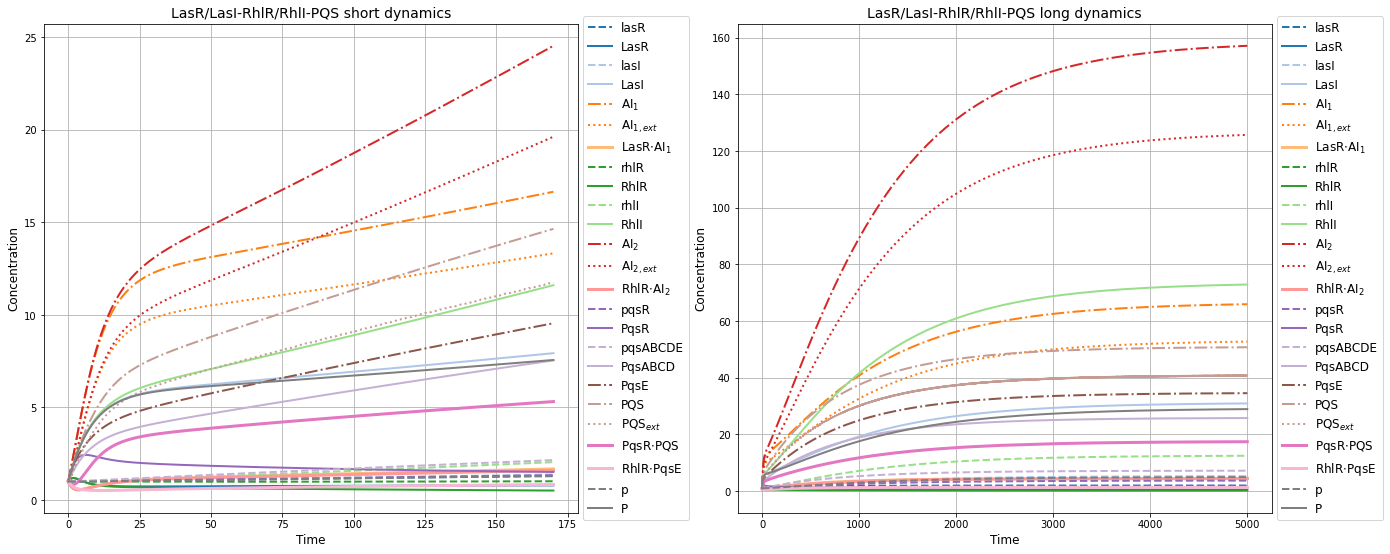

In [13]:
plt.figure(figsize=(22,9))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[0], lw=2, label='lasR', color=cm.tab20(0), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[1], lw=2, label='LasR', color=cm.tab20(0), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[2], lw=2, label='lasI', color=cm.tab20(1), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[3], lw=2, label='LasI', color=cm.tab20(1), ls='-') 
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[4], lw=2, label='AI$_1$', color=cm.tab20(2), ls='-.')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[5], lw=2, label='AI$_{1,ext}$', color=cm.tab20(2), ls=':')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[6], lw=3, label='LasR$\cdot$AI$_1$', color=cm.tab20(3), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[7], lw=2, label='rhlR', color=cm.tab20(4), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[8], lw=2, label='RhlR', color=cm.tab20(4), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[9], lw=2, label='rhlI', color=cm.tab20(5), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[10], lw=2, label='RhlI', color=cm.tab20(5), ls='-') 
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[11], lw=2, label='AI$_2$', color=cm.tab20(6), ls='-.')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[12], lw=2, label='AI$_{2,ext}$', color=cm.tab20(6), ls=':')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[13], lw=3, label='RhlR$\cdot$AI$_2$', color=cm.tab20(7), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[14], lw=2, label='pqsR', color=cm.tab20(8), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[15], lw=2, label='PqsR', color=cm.tab20(8), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[16], lw=2, label='pqsABCDE', color=cm.tab20(9), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[17], lw=2, label='PqsABCD', color=cm.tab20(9), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[18], lw=2, label='PqsE', color=cm.tab20(10), ls='-.')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[19], lw=2, label='PQS', color=cm.tab20(11), ls='-.')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[20], lw=2, label='PQS$_{ext}$', color=cm.tab20(11), ls=':')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[21], lw=3, label='PqsR$\cdot$PQS', color=cm.tab20(12), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[22], lw=3, label='RhlR$\cdot$PqsE', color=cm.tab20(13), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[23], lw=2, label='p', color=cm.tab20(14), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_short.t, LasRI_RhlRI_PQS_qs_dynamics_short.y[24], lw=2, label='P', color=cm.tab20(14), ls='-')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.22, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('LasR/LasI-RhlR/RhlI-PQS short dynamics', fontsize=14)
plt.subplot(1,2,2)
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[0], lw=2, label='lasR', color=cm.tab20(0), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[1], lw=2, label='LasR', color=cm.tab20(0), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[2], lw=2, label='lasI', color=cm.tab20(1), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[3], lw=2, label='LasI', color=cm.tab20(1), ls='-') 
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[4], lw=2, label='AI$_1$', color=cm.tab20(2), ls='-.')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[5], lw=2, label='AI$_{1,ext}$', color=cm.tab20(2), ls=':')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[6], lw=3, label='LasR$\cdot$AI$_1$', color=cm.tab20(3), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[7], lw=2, label='rhlR', color=cm.tab20(4), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[8], lw=2, label='RhlR', color=cm.tab20(4), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[9], lw=2, label='rhlI', color=cm.tab20(5), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[10], lw=2, label='RhlI', color=cm.tab20(5), ls='-') 
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[11], lw=2, label='AI$_2$', color=cm.tab20(6), ls='-.')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[12], lw=2, label='AI$_{2,ext}$', color=cm.tab20(6), ls=':')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[13], lw=3, label='RhlR$\cdot$AI$_2$', color=cm.tab20(7), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[14], lw=2, label='pqsR', color=cm.tab20(8), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[15], lw=2, label='PqsR', color=cm.tab20(8), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[16], lw=2, label='pqsABCDE', color=cm.tab20(9), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[17], lw=2, label='PqsABCD', color=cm.tab20(9), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[18], lw=2, label='PqsE', color=cm.tab20(10), ls='-.')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[19], lw=2, label='PQS', color=cm.tab20(11), ls='-.')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[20], lw=2, label='PQS$_{ext}$', color=cm.tab20(11), ls=':')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[21], lw=3, label='PqsR$\cdot$PQS', color=cm.tab20(12), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[22], lw=3, label='RhlR$\cdot$PqsE', color=cm.tab20(13), ls='-')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[23], lw=2, label='p', color=cm.tab20(14), ls='--')
plt.plot(LasRI_RhlRI_PQS_qs_dynamics_long.t, LasRI_RhlRI_PQS_qs_dynamics_long.y[24], lw=2, label='P', color=cm.tab20(14), ls='-')
plt.grid()
plt.legend(loc='center right', bbox_to_anchor=(1.22, 0.50), ncol=1, fancybox=True, shadow=False, fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('LasR/LasI-RhlR/RhlI-PQS long dynamics', fontsize=14)
plt.show()